# [E-02]Classification

간단한 3가지 데이터에 대한 분류문제를 해결한 과정과 각각에 대한 약간의 EDA를 진행했고 Feature Engineering에 대해 이해해보려고 했습니다.



## 손글씨 분류

### (1) 모듈 임포트

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### (2) 데이터 준비

In [58]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

### (3) 데이터 이해하기

손글씨 분석에서는 각각의 픽셀이 특성값(Feature)가 되므로 별도의 EDA를 진행하지 않아도 될 것 같습니다. 혹시 EDA를 한다면 픽셀값의 분포가 어떻게 되는 지를 할 수 있을 것 같지만 여기서는 흑백인 데이터를 사용하게 더욱 필요없을 것 같아 진행하지 않겠습니다.

In [59]:
digits_data = digits.data
digits_label = digits.target

print(f"digits_data has the shape: {digits_data.shape}")
print(f"digits_label has the shape: {digits_label.shape}")

digits_data has the shape: (1797, 64)
digits_label has the shape: (1797,)


In [60]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

`.target_names`를 출력해보니 0~9까지의 숫자들로 라벨(target)이 구성되있음을 알 수 있습니다.

데이터를 제대로 가져왔는지, 라벨링의 오류는 없는지 시각화를 해봅니다.

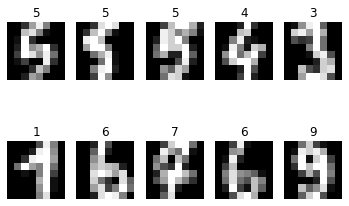

In [61]:
rng = np.random.default_rng(66)

for i in range(10):
    plt.subplot(2, 5, i+1)
    idx = rng.integers(0, 1797)
    plt.imshow(digits_data[idx].reshape(8, 8), cmap='gray')
    plt.title(f"{digits_label[idx]}")
    plt.axis('off')
plt.show()

### (4) train, test 데이터 분리

In [62]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    digits_label,
                                                    test_size=0.2,
                                                    random_state=66)

In [63]:
print(f"X_train의 갯수: {len(X_train)}, y_train의 갯수: {len(y_train)}")
print(f"X_test의 갯수: {len(X_test)}, y_test의 갯수: {len(y_test)}")

X_train의 갯수: 1437, y_train의 갯수: 1437
X_test의 갯수: 360, y_test의 갯수: 360


### (5) 다양한 모델로 학습시켜보기

In [325]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=66)
print(f"decision_tree is a {decision_tree._estimator_type}")

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=66)
print(f"random_forest is a {random_forest._estimator_type}")

from sklearn import svm
svm_model = svm.SVC()
print(f"svm_model is a {svm_model._estimator_type}")

from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
print(f"sgd_model is a {sgd_model._estimator_type}")

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=100000)
print(f"logistic_model is a {logistic_model._estimator_type}")

decision_tree is a classifier
random_forest is a classifier
svm_model is a classifier
sgd_model is a classifier
logistic_model is a classifier


모델을 만들어 주었으니 fit, predict를 해서 성능을 살펴보겠습니다. 

_`LogisticRegression`의 경우 제대로 fit하지 못 해 warning이 뜨는 문제를 해결하기 위해
`max_iter=100000`을 추가해줬습니다._

In [58]:
model_list = [decision_tree, random_forest, svm_model, sgd_model, logistic_model]
score_dict = {}

In [59]:
def fit_and_predict(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    score_dict[model] = round(acc, 3)


In [88]:
for model in model_list:
    fit_and_predict(model)

In [94]:
score_dict = dict(sorted(score_dict.items(), key=lambda x: x[1], reverse=True))

In [97]:
for k, v in score_dict.items():
    print(f"{k}: {v:.2%}")

SVC(): 98.60%
RandomForestClassifier(random_state=66): 98.10%
LogisticRegression(max_iter=100000): 97.50%
SGDClassifier(): 95.60%
DecisionTreeClassifier(random_state=66): 84.40%


확인결과 SVM의 결과가 근소한 차이지만 어쨌든 가장 좋네요. 결정트리 같은 경우에 84%라는 비교적 낮은 성능을 보여주고 있습니다.

`accuracy_score`로 측정한 결과이므로 다른 metric도 사용해보겠습니다. metric을 한번에 확인하기 위해 `classification_report`를 사용하겠습니다.

이번에도 간단한 함수를 만들어 확인해보겠습니다.

In [100]:
for model in model_list:
    y_pred = model.predict(X_test)
    print(model)
    print(classification_report(y_test, y_pred))
    print('=' * 55)

DecisionTreeClassifier(random_state=66)
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        41
           1       0.80      0.86      0.83        42
           2       0.92      0.89      0.90        37
           3       0.84      0.79      0.81        33
           4       0.92      0.83      0.87        41
           5       0.87      0.80      0.84        41
           6       0.91      0.88      0.89        33
           7       0.76      0.89      0.82        28
           8       0.79      0.79      0.79        24
           9       0.71      0.72      0.72        40

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360

RandomForestClassifier(random_state=66)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       0.98      0.98      0.98        4

출력을 해보고 나니 어떤 숫자를 가장 분류를 못할까가 궁금해졌습니다. 아무래도 1과 7을 구별하기 어렵고 8도 왠지 구분하기 어려울 것 같은데 확인해보겠습니다.

각 모델별로 가장 f1-score이 낮은 숫자가 확인해보기위해 위의 코드를 살짝 수정하겠습니다.

In [138]:
report_dict = {}
for model in model_list:
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    report_dict[str(model)] = report

In [139]:
report_dict.keys()

dict_keys(['DecisionTreeClassifier(random_state=66)', 'RandomForestClassifier(random_state=66)', 'SVC()', 'SGDClassifier()', 'LogisticRegression(max_iter=100000)'])

In [173]:
wrongest_dict = {}
for k, v in report_dict.items():

    temp_list = []
    for dict_key in report_dict[k].keys():
        if dict_key.isdigit():
            temp_list.append(report_dict[k][str(dict_key)]["f1-score"])
    min_num = np.array(temp_list).argmin()
    wrongest_dict[k] = min_num


In [174]:
wrongest_dict

{'DecisionTreeClassifier(random_state=66)': 9,
 'RandomForestClassifier(random_state=66)': 3,
 'SVC()': 8,
 'SGDClassifier()': 8,
 'LogisticRegression(max_iter=100000)': 8}

각각 뭘 가장 많이 틀렸는지 f1-score 기준으로 확인해봤습니다. 여러 metric이 있지만 precision과 recall 모두 고려할 수 있는 f1-score를 이용했습니다.

결과적으로 8이 가장 많이 틀리는 숫자이므로 8을 한번 확인해보겠습니다. 편의상 `SVC()`가 어떻게 8을 예측했는지만 체크해보겠습니다.

In [199]:
svc_pred = model.predict(X_test)
wrong_index = []

for i, (pred, truth) in enumerate(zip(svc_pred, y_test)):
    if truth == 8 and pred != 8:
        wrong_index.append(i)

In [200]:
wrong_index

[59, 77, 145]

In [201]:
X_test[wrong_index[0]].shape

(64,)

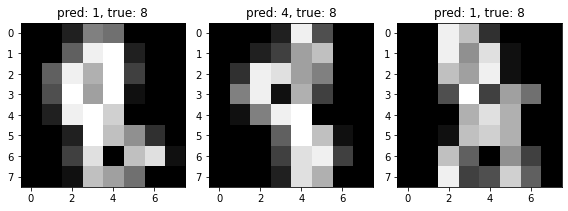

In [204]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 8))
axs = axes.ravel()
for i in range(3):
    axs[i].imshow(X_test[wrong_index[i]].reshape(8, 8), cmap='gray')
    axs[i].set_title(f"pred: {svc_pred[wrong_index[i]]}, true: {y_test[wrong_index[i]]}")

fig.tight_layout()

출력해보니 정말로 1, 4, 1 정도로 보일 수도 있겠다 싶습니다.

### 소감

1. TODO

- [ ] 모든 모델이 정확히 어떻게 작동하고 왜 성능적 차이가 있는 지 생각해보기
- [ ] Pythonic 하지 않게 코딩한 부분 수정하기. => 가장 낮은 f1-score 찾는 부분
- [ ] 이미지 데이터를 EDA하는 방법은 어떤 게 있을 지 알아보기.

2. 소감

다양한 머신러닝 모델을 이용해볼 수 있어서 좋았습니다. MNIST처럼 크기가 더 큰 데이터를 사용하면 어떤 결과를 보일까 궁금하네요. 아마 비슷한 결과를 보일 것 같아요.

많은 종류의 metric을 다뤄볼 수 있었는데 아쉽게도 이번 데이터는 큰 차이가 없었습니다. Feature가 픽셀로 구성되있는 이미지 데이터를 이해하는 것이 일반적인 명시된 Feature에 비해 직관적으로 이해가 쏙쏙 되지는 않습니다.

CNN에서의 이미지 분류는 해봤는데 ML에서의 방식을 접해볼 수 있는 기회였습니다.


## 와인 분류

와인 분류에서는 주어지는 특성이 명시적인 특성들이므로 EDA를 해볼 수 있을 것 같습니다.

### (1) 모듈 임포트

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### (2) 데이터 준비

In [2]:
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

### (3) 데이터 이해하기

In [3]:
wine_data = wine.data
wine_label = wine.target

In [4]:
print(f"wine_data has the shape: {wine_data.shape}")
print(f"wine_label has the shape: {wine_label.shape}")

wine_data has the shape: (178, 13)
wine_label has the shape: (178,)


In [5]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [6]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

어떤 와인인지는 모르겠지만 3가지 종류로 분류하고 있음을 알 수 있습니다. 이름은 각각 'class_0', 'class_1', 'class_2'네요. 

추가적으로 어떤 feature 들이 있는 지 확인해보겠습니다.

In [7]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

이런식으로 데이터셋에 대한 설명을 알 수 있습니다. `frame`의 경우 None값을 반환하는데, `frame`은 `as_frame=True`라는 옵션과 함께 사용할 때 DataFrame을 반환합니다.

따라서 다양한 방법으로 데이터를 준비할 수 있고, 아래의 방법은 조금 간단하게 `data`와 `target`을 가져오는 방법입니다.

In [9]:
wine_data, wine_label = load_wine(return_X_y=True)
print(f"wine_data has the shape: {wine_data.shape}")
print(f"wine_label has the shape: {wine_label.shape}")

wine_data has the shape: (178, 13)
wine_label has the shape: (178,)


와인 데이터를 분석하기 위해 Pandas를 이용해보겠습니다.

In [10]:
import pandas as pd
wine_df = pd.DataFrame(wine_data, columns=wine.feature_names)

In [11]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [12]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [13]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

`info(), describe()`를 통해 확인해보니 결측치나 큰 이상치는 없어보입니다. 몇가지 방법을 통해 결측치를 체크해보겠습니다.

In [14]:
#wine_df.isnull().any()
wine_df.isnull().any().sum()
#wine_df.isnull().sum()

0

라벨을 추가하고 어떤 분포를 보이고 있는 지 확인해보겠습니다.

In [15]:
wine_df['label'] = wine_label

In [16]:
label_cnt = wine_df['label'].value_counts().sort_index()

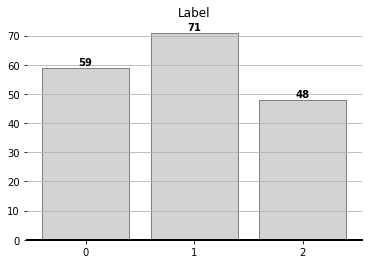

In [17]:
fig, ax = plt.subplots()
ax.bar(label_cnt.index, label_cnt.to_numpy(), color='lightgray', edgecolor='gray')
ax.set_title("Label")
ax.set_xticks([0, 1, 2])

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(int(height), (left+width/2, height+1), ha='center', color='k', fontweight='bold')

ax.grid(axis='y')
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_lw(2)

와알못이라 알콜과 와인의 종류가 얼마나 상관이 있을 지 궁금해졌습니다.

In [18]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [19]:
pd.pivot_table(wine_df, index='label', values='alcohol', aggfunc='mean')

,alcohol
label,
0,13.744746
1,12.278732
2,13.153750


라벨별로 알콜의 평균값이 큰 차이를 보이지는 않네요. 하지만 평균값만으로 살펴보는 건 분포를 무시하기 때문에 적절하지 않을수도 있습니다. 예를 들어 모두 평균이 10이라고 해도, 정말 모든 데이터가 10이라서 10일 수도 있지만, 0과 20의 반복이라 10일 수도 있습니다. 

따라서 각 라벨별로 알콜들이 어떻게 찍히는 지 한번 살펴보겠습니다.

In [20]:
c1_wine_df = wine_df[wine_df['label'] == 0]
c2_wine_df = wine_df[wine_df['label'] == 1]
c3_wine_df = wine_df[wine_df['label'] == 2]

x축을 index로 두고 x축의 표시를 지워 산점도(scatterplot)을 그려봤습닏.ㅏ

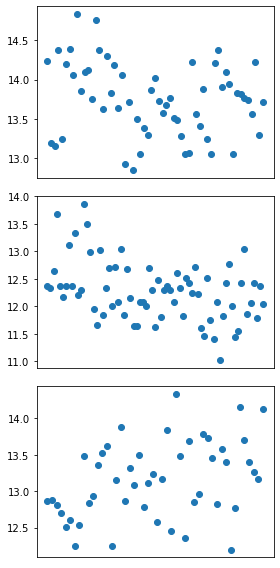

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(4, 8))
axs = axes.ravel()

axs[0].scatter(c1_wine_df.index, c1_wine_df['alcohol'])
axs[0].set_xticks([])

axs[1].scatter(c2_wine_df.index, c2_wine_df['alcohol'])
axs[1].set_xticks([])

axs[2].scatter(c3_wine_df.index, c3_wine_df['alcohol'])
axs[2].set_xticks([])

fig.tight_layout()

조금 더 효과적으로 보기 위해 seaborn을 사용하고 축도 반대로 해보겠습니다. 예쁜 그림을 위해 `ax.spines`를 설정해줬습니다.

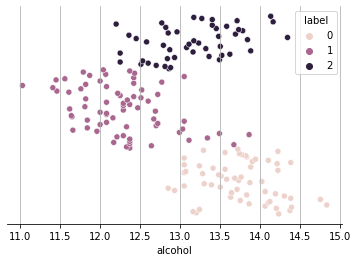

In [22]:
fig, ax = plt.subplots()
sns.scatterplot(data=wine_df, y=wine_df.index, x="alcohol", hue='label', ax=ax)
ax.set_yticks([])

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='x')

그림으로 확인을 해봐도, 각 라벨당 알콜 평균을 구해봐도 알콜은 아무래도 라벨을 구분하는 데 별 차이를 두지 않는 것 같습니다.

알콜과 다른 변수들과의 상관관계를 알아보겠습니다.

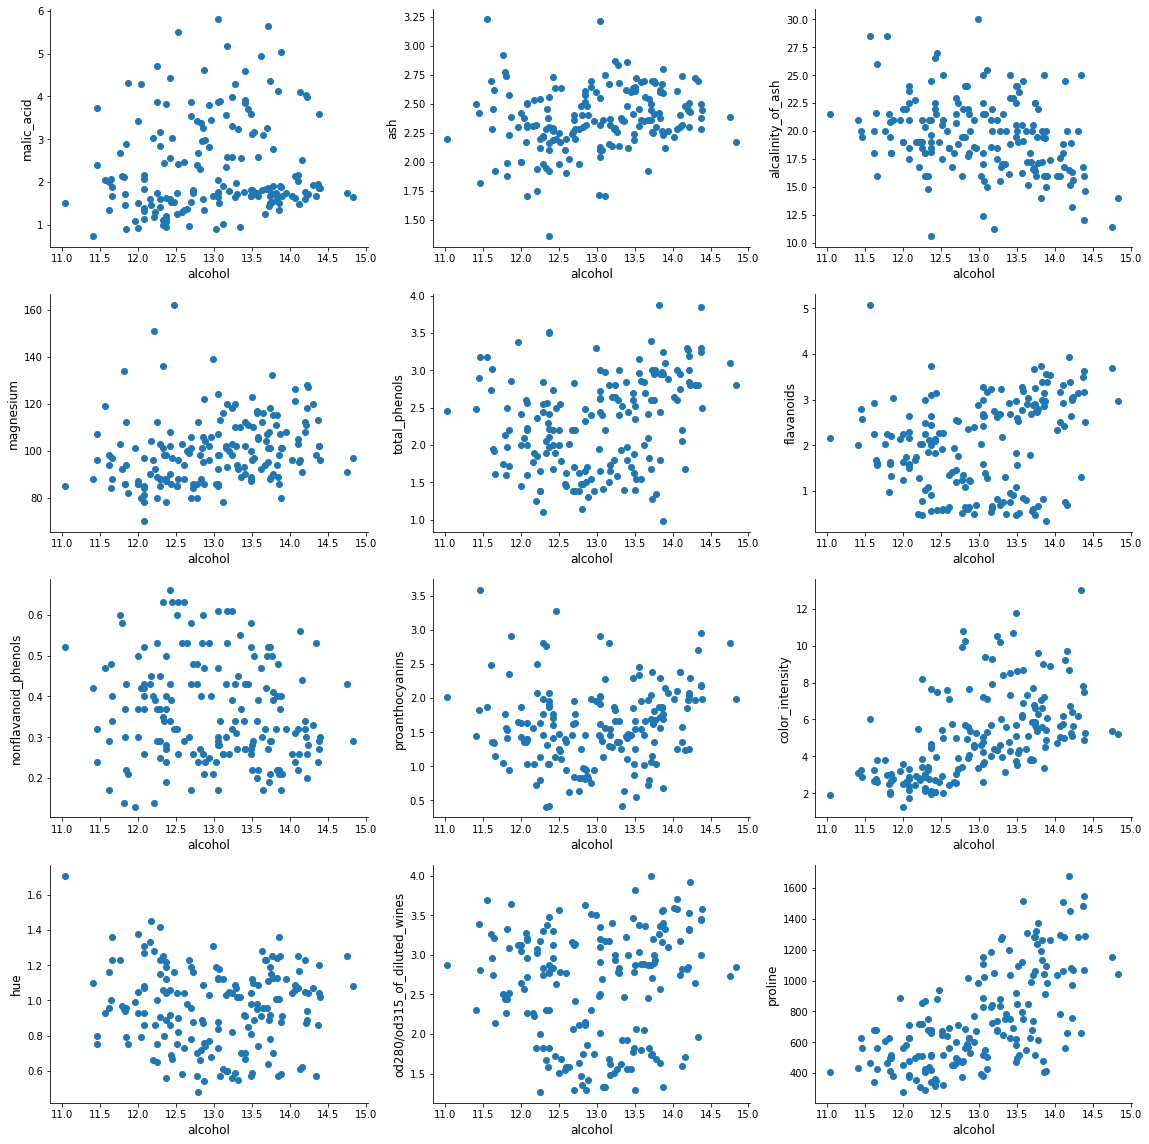

In [23]:
columns = wine_df.columns[1:-1]
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 16))
axs = axes.ravel()
for i, column in enumerate(columns):
    axs[i].scatter(x=wine_df['alcohol'], y=wine_df[column])
    
    axs[i].set_xlabel("alcohol", fontsize=12)
    axs[i].set_ylabel(f"{column}", fontsize=12)
    
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    
plt.tight_layout()

ash, alcalinity_of_ash, magnesium, color_intensity, proline은 왠지 알콜과 관련이 있어보입니다.

In [26]:
alcohol_related = ["ash", "alcalinity_of_ash", "magnesium", "color_intensity", "proline"]

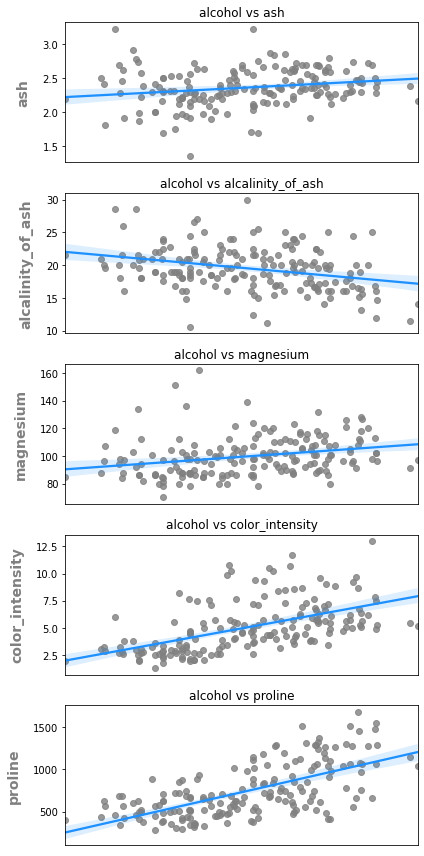

In [32]:
label_fontdict = {"fontsize": 14, "fontweight": "bold", "color": "gray"}
labelpad = 12

xlabel = "alcohol"
tick_labelsize = "large"


fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(6, 12))
axs = axes.ravel()

for i, col in enumerate(alcohol_related):
    
    sns.regplot(data=wine_df, x='alcohol', y=col, ax=axs[i], scatter=True, 
                ci=95, order=1, scatter_kws={"color": "gray"}, line_kws={"color": "dodgerblue"})

    axs[i].set_ylabel(f"{col}", label_fontdict, labelpad)
    axs[i].set_title(f"alcohol vs {col}")
    axs[i].set_xlabel("")
    axs[i].set_xticks([])

fig.tight_layout()

alcalinity_of_ash는 음의 상관관계 나머지는 전부 양의 상관관계를 보이고 있습니다

- [ ] ash vs alcalinity_of_ash

다시 돌아가서 각 라벨별로 데이터를 확인해보고 어떤 값이 유의미할 지 체크해보겠습니다.

In [104]:
c1_wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.0
mean,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,0.0
std,0.462125,0.688549,0.227166,2.546322,10.498949,0.338961,0.397494,0.070049,0.412109,1.238573,0.116483,0.357077,221.520767,0.0
min,12.850000,1.350000,2.040000,11.200000,89.000000,2.200000,2.190000,0.170000,1.250000,3.520000,0.820000,2.510000,680.000000,0.0
25%,13.400000,1.665000,2.295000,16.000000,98.000000,2.600000,2.680000,0.255000,1.640000,4.550000,0.995000,2.870000,987.500000,0.0
50%,13.750000,1.770000,2.440000,16.800000,104.000000,2.800000,2.980000,0.290000,1.870000,5.400000,1.070000,3.170000,1095.000000,0.0
75%,14.100000,1.935000,2.615000,18.700000,114.000000,3.000000,3.245000,0.320000,2.090000,6.225000,1.130000,3.420000,1280.000000,0.0
max,14.830000,4.040000,3.220000,25.000000,132.000000,3.880000,3.930000,0.500000,2.960000,8.900000,1.280000,4.000000,1680.000000,0.0


In [105]:
c2_wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.0
mean,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,1.0
std,0.537964,1.015569,0.315467,3.349770,16.753497,0.545361,0.705701,0.123961,0.602068,0.924929,0.202937,0.496573,157.211220,0.0
min,11.030000,0.740000,1.360000,10.600000,70.000000,1.100000,0.570000,0.130000,0.410000,1.280000,0.690000,1.590000,278.000000,1.0
25%,11.915000,1.270000,2.000000,18.000000,85.500000,1.895000,1.605000,0.270000,1.350000,2.535000,0.925000,2.440000,406.500000,1.0
50%,12.290000,1.610000,2.240000,20.000000,88.000000,2.200000,2.030000,0.370000,1.610000,2.900000,1.040000,2.830000,495.000000,1.0
75%,12.515000,2.145000,2.420000,22.000000,99.500000,2.560000,2.475000,0.430000,1.885000,3.400000,1.205000,3.160000,625.000000,1.0
max,13.860000,5.800000,3.230000,30.000000,162.000000,3.520000,5.080000,0.660000,3.580000,6.000000,1.710000,3.690000,985.000000,1.0


In [106]:
c3_wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.44750,1.153542,7.396250,0.682708,1.683542,629.895833,2.0
std,0.530241,1.087906,0.184690,2.258161,10.890473,0.356971,0.293504,0.12414,0.408836,2.310942,0.114441,0.272111,115.097043,0.0
min,12.200000,1.240000,2.100000,17.500000,80.000000,0.980000,0.340000,0.17000,0.550000,3.850000,0.480000,1.270000,415.000000,2.0
25%,12.805000,2.587500,2.300000,20.000000,89.750000,1.407500,0.580000,0.39750,0.855000,5.437500,0.587500,1.510000,545.000000,2.0
50%,13.165000,3.265000,2.380000,21.000000,97.000000,1.635000,0.685000,0.47000,1.105000,7.550000,0.665000,1.660000,627.500000,2.0
75%,13.505000,3.957500,2.602500,23.000000,106.000000,1.807500,0.920000,0.53000,1.350000,9.225000,0.752500,1.820000,695.000000,2.0
max,14.340000,5.650000,2.860000,27.000000,123.000000,2.800000,1.570000,0.63000,2.700000,13.000000,0.960000,2.470000,880.000000,2.0


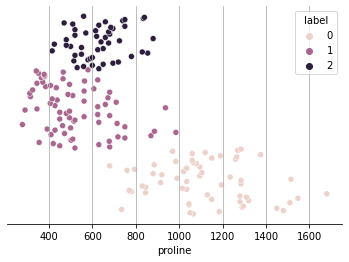

In [109]:
fig, ax = plt.subplots()
sns.scatterplot(data=wine_df, y=wine_df.index, x="proline", hue='label', ax=ax)
ax.set_yticks([])

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='x')

proline이 1000이상이면 무조건 0번 와인으로 분류가 되겠군요! 한번 확인해보겠습니다.

In [113]:
mask = wine_df["proline"] > 1000
proline_df = wine_df[mask]

proline_df['label'].value_counts()

0    43
Name: label, dtype: int64

color intensity도 분류하기에 괜찮은 특성일 것 같습니다.

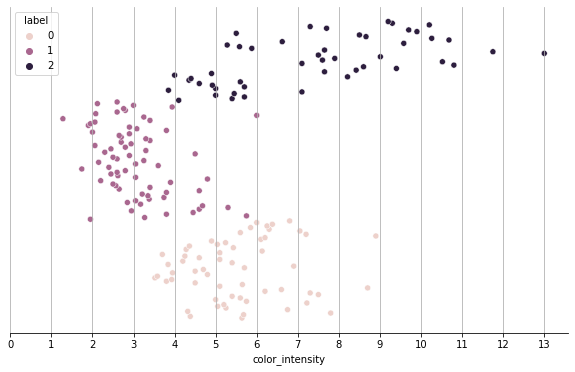

In [118]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=wine_df, y=wine_df.index, x="color_intensity", hue='label', ax=ax)
ax.set_yticks([])

ax.set_xticks([x for x in range(0,14)])
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='x')

완벽하진 않지만 3보다 작으면 class1, 9보다크면 class2로 분류할 수 있을 것 같네요.

지금까지의 노력이 무색하게 한번에 그려서 확인해보겠습니다.

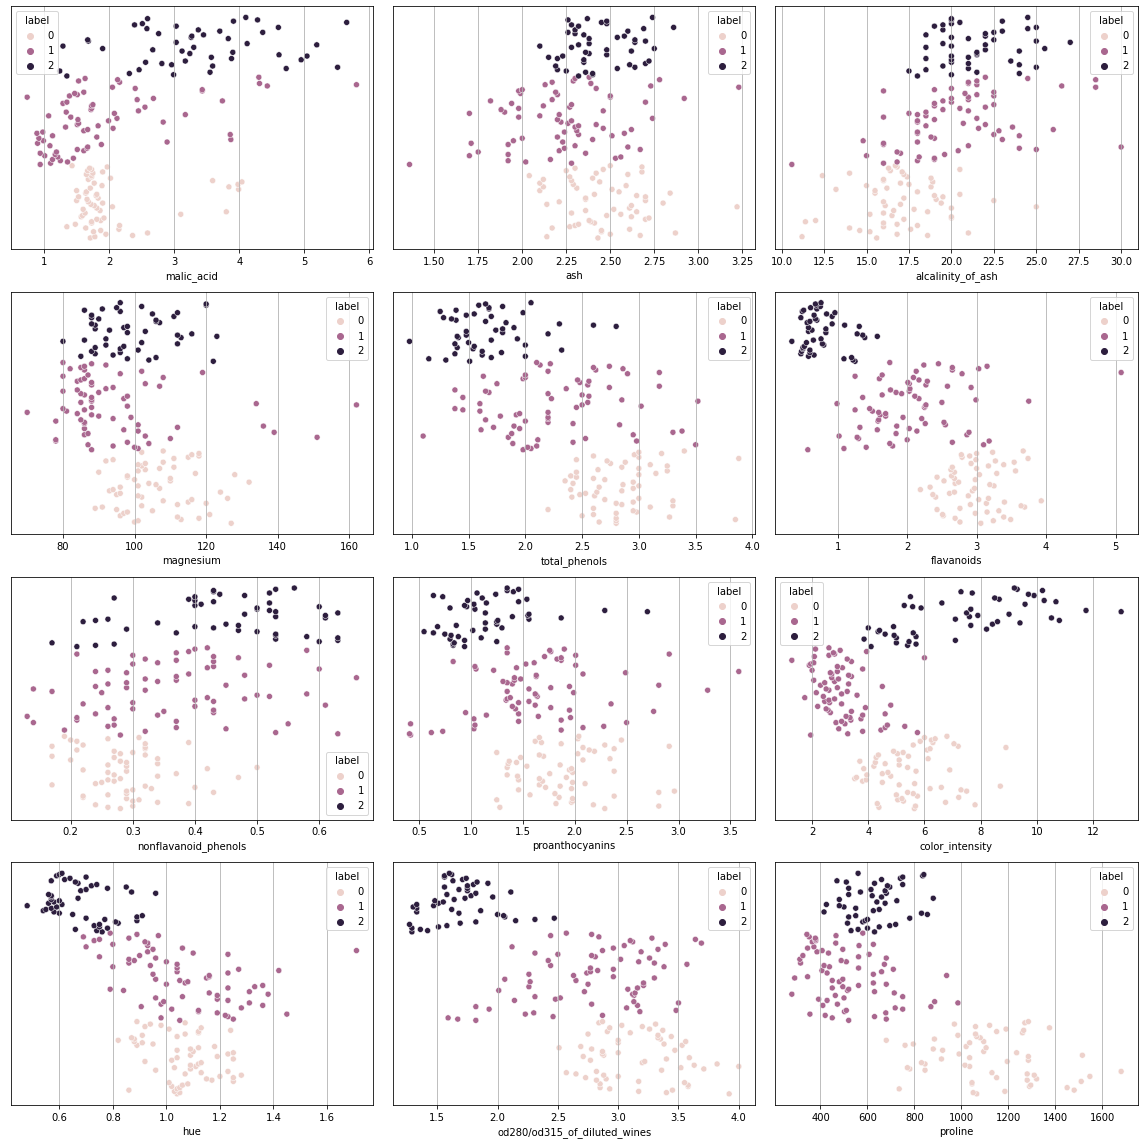

In [121]:
columns = wine_df.columns[1:-1]
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 16))
axs = axes.ravel()
for i, column in enumerate(columns):
    sns.scatterplot(data=wine_df, y=wine_df.index, x=column, hue='label', ax=axs[i])
    
    axs[i].set_yticks([])

    axs[i].grid(axis='x')
    
plt.tight_layout()



위 그래프를 통해 볼 수 있는 다양한 사실을 합쳐보겠습니다.

1. (4, 3)의 그래프를 보면 class1, 2는 400~900에 걸쳐 대부분이 섞여있습니다.
2. class1, 2를 구분지을 수 있는 feature를 찾아보면 
    1. (2, 3)의 flavanoids가 1 이하면 무조건 class2가 됩니다.
    2. (3, 3)의 color_intensity가 대략 3.5이하면 무조건 class1이 됩니다. (1, 2 비교에서)
    3. (4, 1)의 hue는 0.6보다 작으면 무조건 class2입니다.
        * 이 경우는 class2의 hue분포가 비교적 넓게 퍼져있어서 유용하지 않을 수도 있을 것 같습니다.
        
비교적 라벨별로 분포가 정해진 듯 보이는 flavanoids의 분포를 조금 더 살펴보겠습니다.

Text(0.5, 0, 'Label')

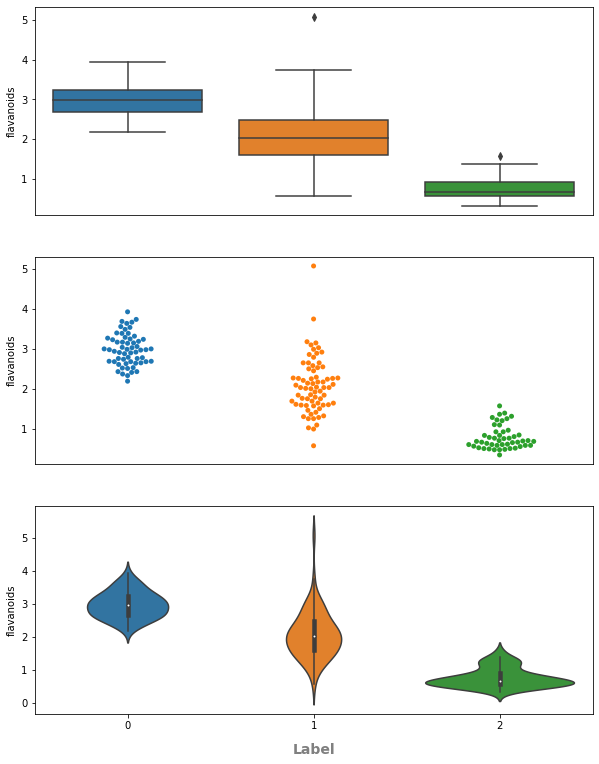

In [133]:
label_fontdict = {"fontsize":14, "fontweight":"bold", "color":"gray"}
labelpad = 12


tick_labelsize = "Large"

fig, axes = plt.subplots(figsize=(10, 13), nrows=3, ncols=1)



axs = axes.ravel()

sns.boxplot(data=wine_df, x='label', y='flavanoids', ax=axs[0], orient='v')
sns.swarmplot(data=wine_df, x='label', y='flavanoids', ax=axs[1], orient='v')
sns.violinplot(data=wine_df, x='label', y='flavanoids', ax=axs[2], orient='v')

for i in range(0, 2):
    axs[i].set_xlabel("")
    axs[i].set_xticks([])

axs[2].set_xlabel("Label", label_fontdict, labelpad)




여러개의 그래프로 그림을 그렸지만, 총체적으로 알 수 있는 건 그래도 분포가 그나마 구분이 가능하게 이뤄져있고 특히 class2의 분포는 구분이 쉽게 이뤄져있습니다.

분포 자체의 모양도 2번, 0번, 1번 순으로 두꺼웠다가 얇아지는 모습을 볼 수 있습니다.

Text(0.5, 0, 'Label')

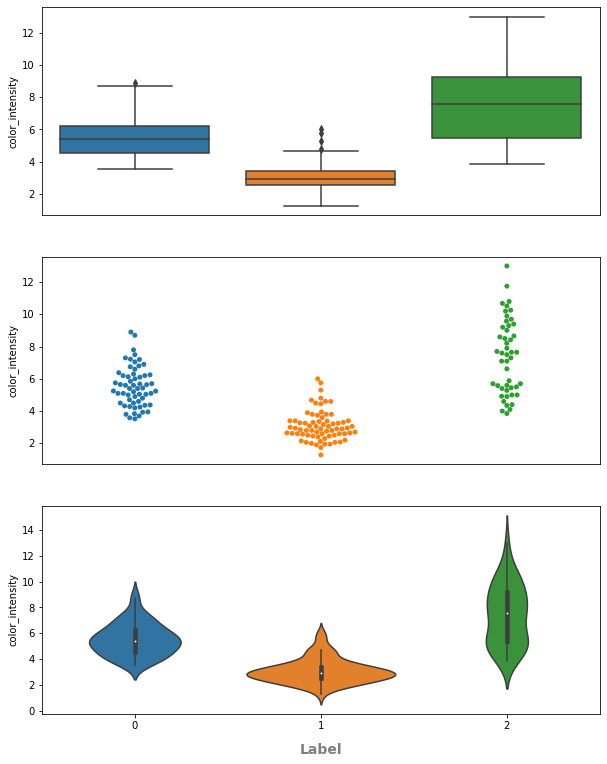

In [135]:
label_fontdict = {"fontsize":14, "fontweight":"bold", "color":"gray"}
labelpad = 12


tick_labelsize = "Large"

fig, axes = plt.subplots(figsize=(10, 13), nrows=3, ncols=1)



axs = axes.ravel()

sns.boxplot(data=wine_df, x='label', y='color_intensity', ax=axs[0], orient='v')
sns.swarmplot(data=wine_df, x='label', y='color_intensity', ax=axs[1], orient='v')
sns.violinplot(data=wine_df, x='label', y='color_intensity', ax=axs[2], orient='v')

for i in range(0, 2):
    axs[i].set_xlabel("")
    axs[i].set_xticks([])

axs[2].set_xlabel("Label", label_fontdict, labelpad)


분포의 모양이 좀 더 확연히 드러나는 특성입니다. 0, 1은 비교적 한 곳에 몰려 있어서 두꺼운 반면 2번은 아주 홀쭉하게 여기저기 뿌려져있습니다.

상관관계를 파악하기 위해 `.corr`를 사용해 스피어먼 상관계수를 확인하는 heatmap을 그려보겠습니다. 

스피어먼 계수란 두 변수간의 랭크(순위)가 얼마나 상관있는지 보는 계수입니다. 두 변수가 얼마나 단조함수, monotonic function으로 나타낼 수 있는 지 체크할 수 있습니다. 그에 따라 부호는 방향을 의미하고, 일반적으로 커질수록 두 변수가 단조함수로 잘 표현된다고 생각할 수 있습니다. 비모수적인 척도입니다.

[위키](https://ko.wikipedia.org/wiki/%EC%8A%A4%ED%94%BC%EC%96%B4%EB%A8%BC_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98)

Text(0.5, 1.0, "Important variables correlation('spearman') map")

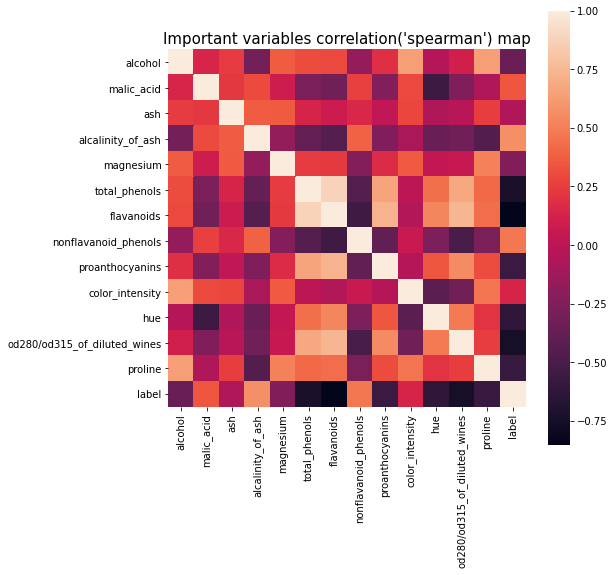

In [140]:
corrmat = wine_df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(corrmat, vmax=1., square=True, ax=ax)
ax.set_title("Important variables correlation('spearman') map", fontsize=15)

이것도 변수끼리의 상관성 찾아보기(linear,...)

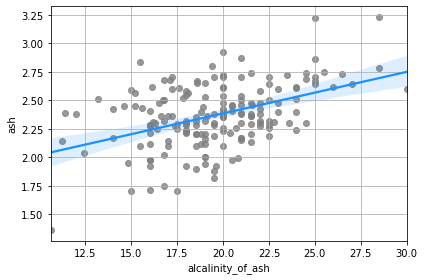

In [102]:
fig, ax = plt.subplots()


sns.regplot(data=wine_df, y="ash", x="alcalinity_of_ash", ax=ax, 
            scatter=True, ci=95, order=1,
            scatter_kws ={'color': 'gray'}, 
            line_kws={"color": "dodgerblue", "label": "Linear"})

ax.grid()
plt.tight_layout()

### (4) train, test 데이터 분리

In [146]:
X_train, X_test, y_train, y_test = train_test_split(wine_data,
                                                    wine_label,
                                                    test_size=0.2,
                                                    random_state=66)

In [15]:
print(f"X_train의 갯수: {len(X_train)}, y_train의 갯수: {len(y_train)}")
print(f"X_test의 갯수: {len(X_test)}, y_test의 갯수: {len(y_test)}")

X_train의 갯수: 142, y_train의 갯수: 142
X_test의 갯수: 36, y_test의 갯수: 36


In [147]:
type(X_train)

numpy.ndarray

### (5) 다양한 모델로 학습시켜보기

In [16]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=67)
print(f"decision_tree is a {decision_tree._estimator_type}")

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=67)
print(f"random_forest is a {random_forest._estimator_type}")

from sklearn import svm
svm_model = svm.SVC()
print(f"svm_model is a {svm_model._estimator_type}")

from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
print(f"sgd_model is a {sgd_model._estimator_type}")

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=100000)
print(f"logistic_model is a {logistic_model._estimator_type}")

decision_tree is a classifier
random_forest is a classifier
svm_model is a classifier
sgd_model is a classifier
logistic_model is a classifier


모델을 만들어 준 뒤 fit을 하고 정확도를 비교해야한다.

In [17]:
model_list = [decision_tree, random_forest, svm_model, sgd_model, logistic_model]
score_dict = {}

In [57]:
def fit_and_predict(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    score_dict[model] = round(acc, 3)

In [19]:
for model in model_list:
    fit_and_predict(model)

In [20]:
score_dict = dict(sorted(score_dict.items(), key=lambda x: x[1], reverse=True))

In [21]:
for k, v in score_dict.items():
    print(f"{k}: {v:.2%}")

RandomForestClassifier(random_state=67): 100.00%
LogisticRegression(max_iter=100000): 100.00%
DecisionTreeClassifier(random_state=67): 97.20%
SVC(): 69.40%
SGDClassifier(): 25.00%


DecisionTree도 97%나 맞추는데 왜 SVC와 SGD는 70%를 못 넘길까요?
[link](https://datascience.stackexchange.com/questions/6838/when-to-use-random-forest-over-svm-and-vice-versa)

Scaling을 해주고 SVC에 대해서 먼저 확인해봅시다.

In [50]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [23]:
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_X_train = scaler.fit_transform(X_train)
print(">>> MinMax Scailing")
print(f"X_train's mean was {X_train.mean():.3}, now {scaled_X_train.mean():.3}")

>>> MinMax Scailing
X_train's mean was 69.1, now 0.409


In [24]:
svm_model.fit(scaled_X_train, y_train)
scaled_X_test = scaler.fit_transform(X_test)

pred = svm_model.predict(scaled_X_test)
acc = accuracy_score(y_test, pred)
print(f"After min max scaling, SVM has accuracy: {acc:.2%}")

After min max scaling, SVM has accuracy: 91.67%


In [25]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.fit_transform(X_train)
print(">>> Standard Scailing")
print(f"X_train's mean was {X_train.mean():.3}, now {scaled_X_train.mean():.3}")

>>> Standard Scailing
X_train's mean was 69.1, now 1.13e-15


In [26]:
svm_model.fit(scaled_X_train, y_train)
scaled_X_test = scaler.fit_transform(X_test)

pred = svm_model.predict(scaled_X_test)
acc = accuracy_score(y_test, pred)
print(f"After standard scaling, SVM has accuracy: {acc:.2%}")

After standard scaling, SVM has accuracy: 100.00%


In [27]:
scaler = RobustScaler()
scaler.fit(X_train)
scaled_X_train = scaler.fit_transform(X_train)
print(">>> Robust Scailing")
print(f"X_train's mean was {X_train.mean():.3}, now {scaled_X_train.mean():.3}")

>>> Robust Scailing
X_train's mean was 69.1, now 0.053


In [28]:
svm_model.fit(scaled_X_train, y_train)
scaled_X_test = scaler.fit_transform(X_test)

pred = svm_model.predict(scaled_X_test)
acc = accuracy_score(y_test, pred)
print(f"After robust scaling, SVM has accuracy: {acc:.2%}")

After robust scaling, SVM has accuracy: 100.00%


똑같은 과정을 그대로 SGD에 확인해보겠습니다.

In [29]:
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_X_train = scaler.fit_transform(X_train)
print(">>> MinMax Scailing")
print(f"X_train's mean was {X_train.mean():.3}, now {scaled_X_train.mean():.3}")

>>> MinMax Scailing
X_train's mean was 69.1, now 0.409


In [30]:
sgd_model.fit(scaled_X_train, y_train)
scaled_X_test = scaler.fit_transform(X_test)

pred = sgd_model.predict(scaled_X_test)
acc = accuracy_score(y_test, pred)
print(f"After min max scaling, SGD has accuracy: {acc:.2%}")

After min max scaling, SGD has accuracy: 100.00%


In [31]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.fit_transform(X_train)
print(">>> Standard Scailing")
print(f"X_train's mean was {X_train.mean():.3}, now {scaled_X_train.mean():.3}")

>>> Standard Scailing
X_train's mean was 69.1, now 1.13e-15


In [32]:
sgd_model.fit(scaled_X_train, y_train)
scaled_X_test = scaler.fit_transform(X_test)

pred = sgd_model.predict(scaled_X_test)
acc = accuracy_score(y_test, pred)
print(f"After standard scaling, SGD has accuracy: {acc:.2%}")

After standard scaling, SGD has accuracy: 97.22%


In [33]:
scaler = RobustScaler()
scaler.fit(X_train)
scaled_X_train = scaler.fit_transform(X_train)
print(">>> Robust Scailing")
print(f"X_train's mean was {X_train.mean():.3}, now {scaled_X_train.mean():.3}")

>>> Robust Scailing
X_train's mean was 69.1, now 0.053


In [34]:
sgd_model.fit(scaled_X_train, y_train)
scaled_X_test = scaler.fit_transform(X_test)

pred = sgd_model.predict(scaled_X_test)
acc = accuracy_score(y_test, pred)
print(f"After robust scaling, SGD has accuracy: {acc:.2%}")

After robust scaling, SGD has accuracy: 97.22%


SGD, SVM과 같이 거리(distance)가 중요한 알고리즘에서는 반드시 스케일링을 해줘야합니다. 

SVM의 경우 분류하는 초평면(hyperplane)간의 마진이 상당히 중요합니다. 따라서 거리를 사용하기 때문에 스케일링을 해줘야 합니다.

SGD의 경우 내가 얼마나 내려갈 지 스텝사이즈, 학습률(learning rate)가 거리에 따라 다르게 작용할 수 있기 때문에 스케일링을 해줘야합니다.

[참고](https://stats.stackexchange.com/questions/244507/what-algorithms-need-feature-scaling-beside-from-svm)

[SGD](https://stats.stackexchange.com/questions/499398/sgd-is-sensitive-to-feature-scaling)

- [ ] 각 모델, 알고리즘 마다 특성을 파악하고 장/단점 언제 쓰이는 지 생각하자.

### Feature Engineering

한번 쓸모없어 보이는 Feature들을 제외한 후에 학습결과가 얼마나 달라질 지 체크해보겠습니다. 위쪽에서 라벨과 특성값간의 산점도를 그린 그래프에서 상관없어보이는 `magnesium`, `nonflavanoid_phenols`를 한번 삭제해보겠습니다. 

_우선 가장 먼저 원래의 데이터에서 label 컬럼을 버려줘야 합니다. 따라서 애초에 원본데이터는 건드리지 않고 copy해서 사용하는 것이 더 좋아보입니다.(추후 수정)_

In [34]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=66)
print(f"decision_tree is a {decision_tree._estimator_type}")

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=66)
print(f"random_forest is a {random_forest._estimator_type}")

from sklearn import svm
svm_model = svm.SVC()
print(f"svm_model is a {svm_model._estimator_type}")

from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
print(f"sgd_model is a {sgd_model._estimator_type}")

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=100000)
print(f"logistic_model is a {logistic_model._estimator_type}")

decision_tree is a classifier
random_forest is a classifier
svm_model is a classifier
sgd_model is a classifier
logistic_model is a classifier


In [48]:
model_list = [decision_tree, svm_model, sgd_model, logistic_model]

In [40]:
extracted_wine_df = wine_df.drop('label', axis=1)

In [42]:
useless_col = ["magnesium", "nonflavanoid_phenols"]

In [43]:
extracted_wine_df = extracted_wine_df.drop(useless_col, axis=1)

In [44]:
extracted_wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,total_phenols,flavanoids,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,2.80,3.06,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,2.65,2.76,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,2.80,3.24,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,3.85,3.49,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,2.80,2.69,1.82,4.32,1.04,2.93,735.0


In [45]:
extracted_data = extracted_wine_df.to_numpy()

In [46]:
extracted_data.shape

(178, 11)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(extracted_data,
                                                    wine_label,
                                                    test_size=0.2,
                                                    random_state=66)

잊지않고 스케일링도 해주겠습니다.

In [69]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.fit_transform(X_train)
print(">>> Standard Scailing")
print(f"X_train's mean was {X_train.mean():.3}, now {scaled_X_train.mean():.3}")

>>> Standard Scailing
X_train's mean was 72.5, now 1.42e-15


In [70]:
score_dict={}
def fit_and_predict(model):
    model.fit(scaled_X_train, y_train)
    scaled_X_test = scaler.fit_transform(X_test)
    pred = model.predict(scaled_X_test)
    acc = accuracy_score(y_test, pred)
    score_dict[model] = round(acc, 3)

In [71]:
for model in model_list:
    fit_and_predict(model)

In [72]:
score_dict = dict(sorted(score_dict.items(), key=lambda x: x[1], reverse=True))

In [73]:
for k, v in score_dict.items():
    print(f"{k}: {v:.2%}")

RandomForestClassifier(random_state=66): 100.00%
SVC(): 100.00%
SGDClassifier(): 97.20%
LogisticRegression(max_iter=100000): 97.20%
DecisionTreeClassifier(random_state=66): 94.40%


의사결정 트리의 경우 스케일링에 따라 변하지는 않기에 그 요인은 무시하더라도 오히려 3%정도 성능이 떨어졌습니다.

그렇다면 의사결정 트리에서 사용하는 `feature_importances_`를 구해보겠습니다. 다시 원래 데이터로 학습을 진행하고 살펴보겠습니다.

In [74]:
X_train, X_test, y_train, y_test = train_test_split(wine_data,
                                                    wine_label,
                                                    test_size=0.2,
                                                    random_state=66)

In [75]:
X_test.shape

(36, 13)

In [76]:
decision_tree_2 = DecisionTreeClassifier(random_state=67)

In [77]:
decision_tree_2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=67)

In [78]:
pred = decision_tree_2.predict(X_test)
acc = accuracy_score(y_test, pred)
feature_importances = decision_tree_2.feature_importances_

In [79]:
len(feature_importances)

13

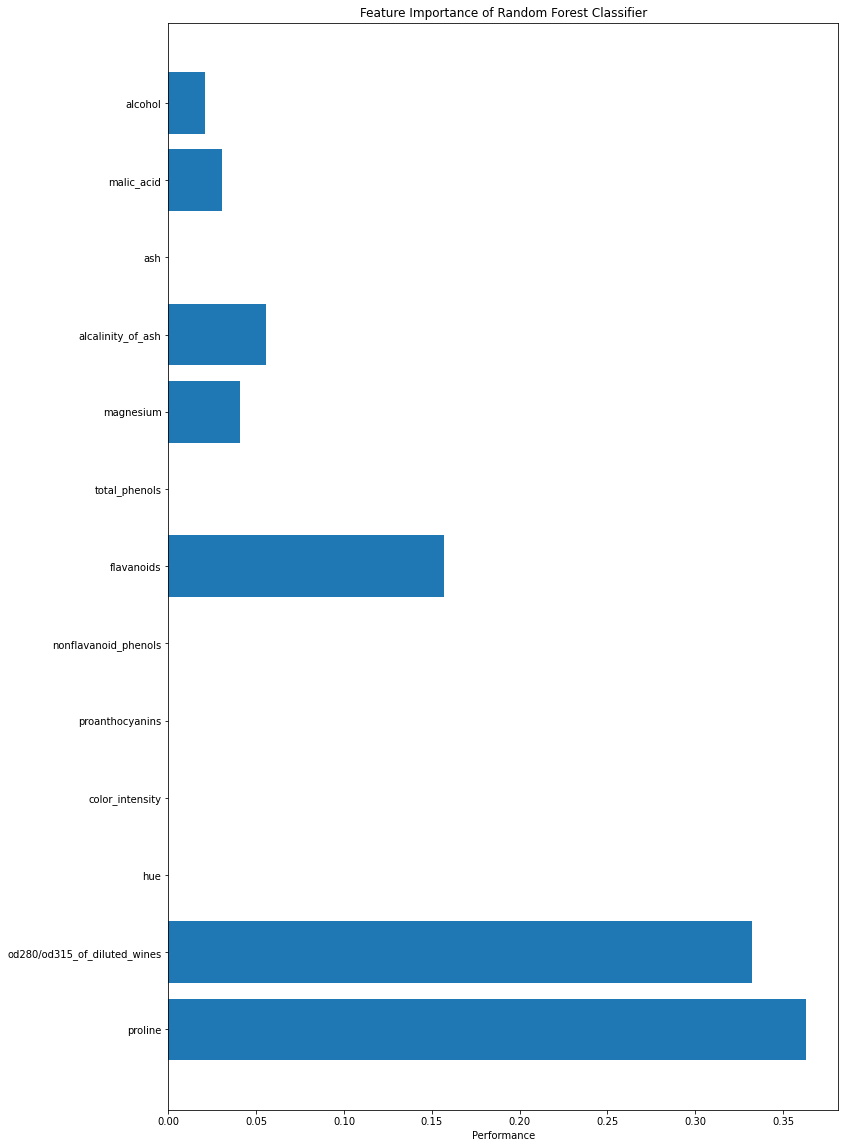

In [80]:
fig, ax = plt.subplots(figsize=(12, 20))
y_pos = np.arange(len(feature_importances))

ax.barh(y_pos, feature_importances, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(wine_df.columns[:-1])
ax.invert_yaxis()
ax.set_xlabel('Performance')
ax.set_title('Feature Importance of Random Forest Classifier')

plt.show()

magnesium과 nonflavanoid_phenols중에 magnesium은 feature_importance가 어느정도 있는 걸 보면 직관과 달리 함부로 버려서는 안되는 특성값인 것 같습니다!

그리고 그래프를 보면 od280/od315_of_diluted_wines, proline가 가장 중요한 feature인가 봅니다! 한번 삭제하면 성능이 얼마나 나빠질 지 확인해보겠습니다. DT의 원래 성능은 약 97% 였습니다!

In [81]:
useless_col = ["od280/od315_of_diluted_wines", "proline"]

In [82]:
extracted_wine_df = wine_df.drop('label', axis=1)

In [83]:
extracted_wine_df = extracted_wine_df.drop(useless_col, axis=1)

In [84]:
extracted_wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04


In [85]:
extracted_data = extracted_wine_df.to_numpy()

In [86]:
extracted_data.shape

(178, 11)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(extracted_data,
                                                    wine_label,
                                                    test_size=0.2,
                                                    random_state=66)

In [88]:
decision_tree_3 = DecisionTreeClassifier(random_state=123)

의사결정나무에서만 확인을 할 것이기 때문에 별도의 스케일링은 진행하지 않겠습니다.

In [89]:
decision_tree_3.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

In [90]:
pred = decision_tree_3.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f"{acc:.2%}")

97.22%


어라, 원래 결과보다 오히려 아주 조금, 0.02퍼센트 올랐네요. 오히려 영향력이 없어보이는 ash와 hue를 지워보겠습니다.

In [97]:
extracted_wine_df = wine_df.drop('label', axis=1)

In [98]:
useless_col = ["ash", "hue"]
extracted_wine_df = extracted_wine_df.drop(useless_col, axis=1)

In [99]:
extracted_wine_df.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,od280/od315_of_diluted_wines,proline
0,14.23,1.71,15.6,127.0,2.80,3.06,0.28,2.29,5.64,3.92,1065.0
1,13.20,1.78,11.2,100.0,2.65,2.76,0.26,1.28,4.38,3.40,1050.0
2,13.16,2.36,18.6,101.0,2.80,3.24,0.30,2.81,5.68,3.17,1185.0
3,14.37,1.95,16.8,113.0,3.85,3.49,0.24,2.18,7.80,3.45,1480.0
4,13.24,2.59,21.0,118.0,2.80,2.69,0.39,1.82,4.32,2.93,735.0


In [100]:
extracted_data = extracted_wine_df.to_numpy()
extracted_data.shape

(178, 11)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(extracted_data,
                                                    wine_label,
                                                    test_size=0.2,
                                                    random_state=66)

In [102]:
decision_tree_3 = DecisionTreeClassifier(random_state=123)
decision_tree_3.fit(X_train, y_train)

pred = decision_tree_3.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f"{acc:.2%}")

88.89%


오히려 성능이 떨어진 것을 볼 수 있습니다. 아무래도 feature_importance도 무작정 믿을 수 있는 건 아닌가봅니다. `permutation_importance`를 한번 구해보겠습니다. 다시 원본 데이터를 가져오겠습니다.

In [109]:
X_train, X_test, y_train, y_test = train_test_split(wine_data,
                                                    wine_label,
                                                    test_size=0.2,
                                                    random_state=66)

In [110]:
from sklearn.inspection import permutation_importance

In [111]:
decision_tree_4 = DecisionTreeClassifier(random_state=125)
decision_tree_4.fit(X_train, y_train)

DecisionTreeClassifier(random_state=125)

In [112]:
permutation_importance = permutation_importance(decision_tree_4, 
                                                X_train, y_train, n_repeats=10, 
                                                random_state=0)

In [113]:
permutation_importance['importances_mean'].shape

(13,)

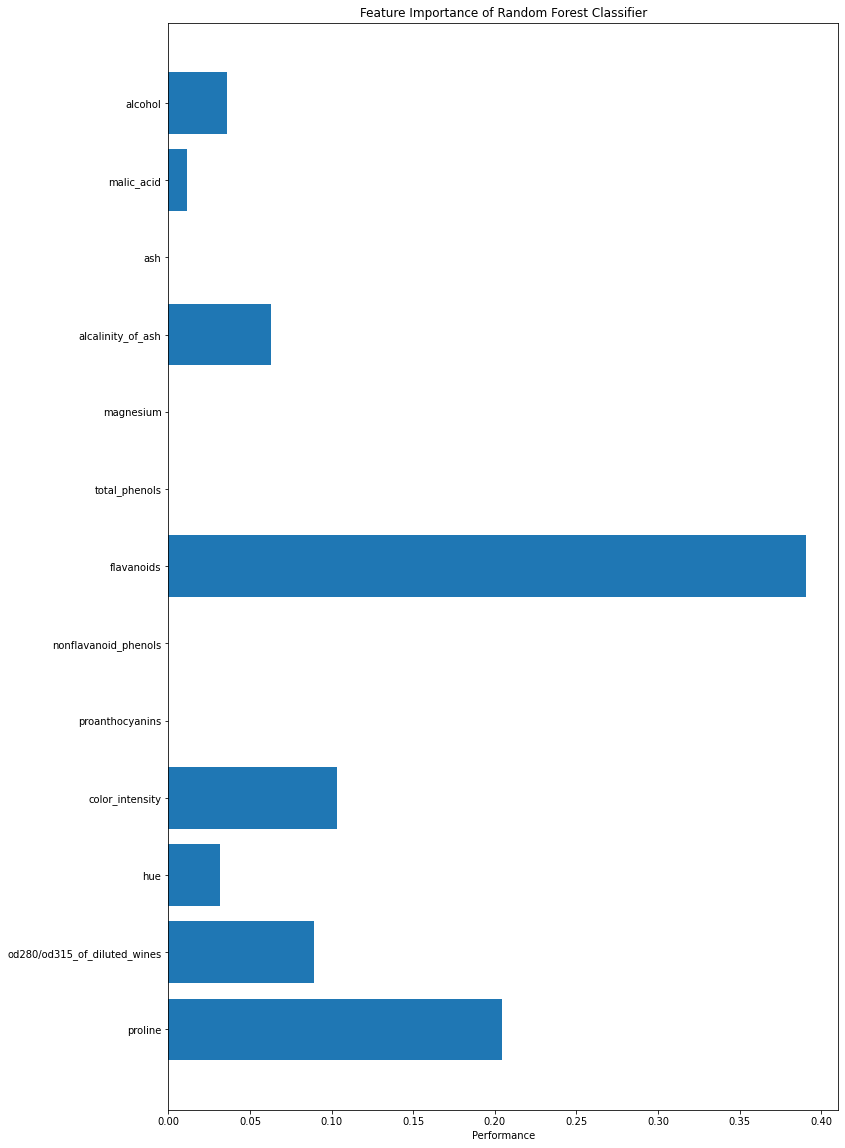

In [115]:
fig, ax = plt.subplots(figsize=(12, 20))
y_pos = np.arange(len(permutation_importance['importances_mean']))

ax.barh(y_pos, permutation_importance['importances_mean'], align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(wine_df.columns[:-1])
ax.invert_yaxis()
ax.set_xlabel('Performance')
ax.set_title('Feature Importance of Random Forest Classifier')

plt.show()

결과적으로 hue는 어느정도 영향을 보이는 걸 봐서는 함부로 버려서는 안됐던 것 같습니다.

## 유방암 분류

### (1) 모듈 임포트

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### (2) 데이터 준비

이번에는 DataFrame도 `as_frame`을 사용해 만들어보겠습니다.

In [118]:
cancer = load_breast_cancer(as_frame=True)
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

### (3) 데이터 이해하기

In [119]:
cancer_data = cancer.data
cancer_label = cancer.target

In [120]:
print(f"cancer_data has the shape: {cancer_data.shape}")
print(f"cancer_label has the shape: {cancer_label.shape}")

cancer_data has the shape: (569, 30)
cancer_label has the shape: (569,)


In [121]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

malignant인 경우가 위험하고, benign은 위험하지 않은 경우 임을 알 수 있습니다.

In [122]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [123]:
cancer_df = cancer.frame

In [124]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [125]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [126]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [127]:
cancer_df.isnull().any()

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
target    

`describe()`, `info()`를 활용해 데이터를 살펴보니 결측치, 이상치는 없습니다. 전부 수치형 데이터로 이뤄져있기 때문에 사용하는 모델에 따라 스케일링도 잘 고려해야겠습니다. 데이터가 균등하게 있는 지 한번 확인해보겠습니다.

In [12]:
target_cnt = cancer_df['target'].value_counts().sort_index()

In [13]:
list(cancer.target_names)

['malignant', 'benign']

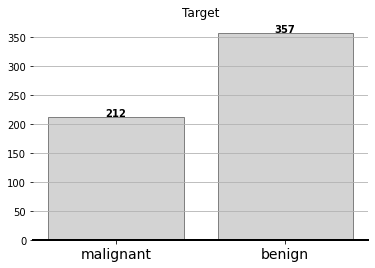

In [14]:
fig, ax = plt.subplots()
ax.bar(target_cnt.index, target_cnt.to_numpy(), color='lightgray', edgecolor='gray')
ax.set_title("Target")
ax.set_xticks([0, 1])
ax.set_xticklabels(list(cancer.target_names), fontsize=14)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(int(height), (left+width/2, height+1), ha='center', color='k', fontweight='bold')

ax.grid(axis='y')
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_lw(2)

In [15]:
cancer_df.columns[:10]

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension'],
      dtype='object')

위에서의 경험을 교훈삼아 이번엔 바로 한번에 그려서 라벨과 각 특성간의 관계를 살펴보겠습니다. 대신 특성들의 이름을 보면 error, worst 등이 붙는 경우는 측정오차나 최악의 경우를 의미하는 특성처럼 보이므로 그렇지 않는 특성들로만 살펴보겠습니다.

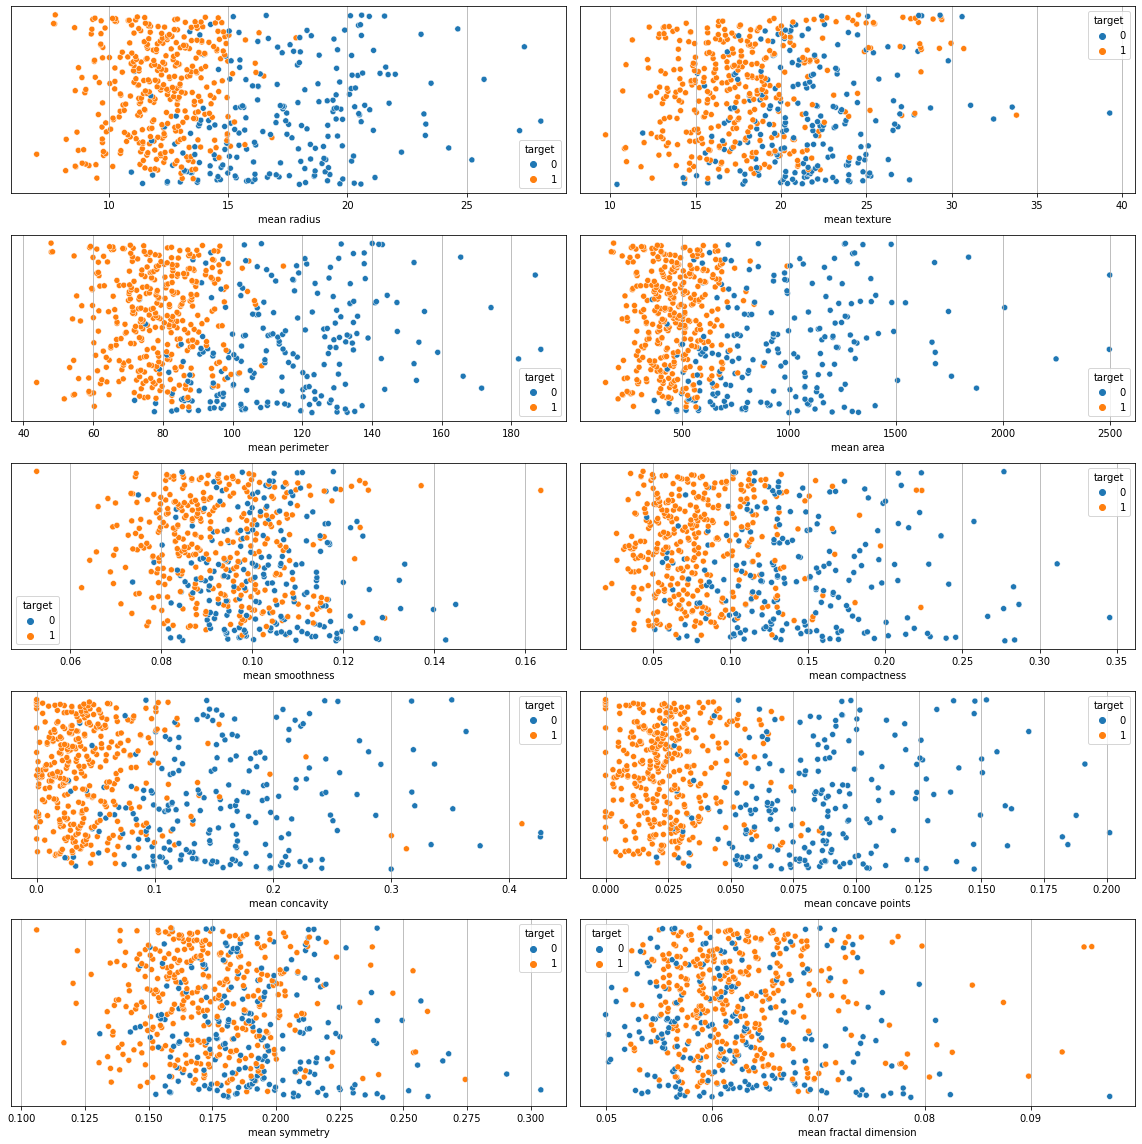

In [16]:
columns = cancer_df.columns[:10]
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 16))
axs = axes.ravel()

for i, column in enumerate(columns):
    sns.scatterplot(data=cancer_df, y=cancer_df.index, x=column, hue='target', ax=axs[i])
    
    axs[i].set_yticks([])

    axs[i].grid(axis='x')
    
plt.tight_layout()


각 특성들이 라벨에 따라 다르게 분포하는 지 하나씩 살펴보며 분류해보면 다음과 같습니다.
* 라벨에 따라 차이를 보이는 특성: `['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points']`


* 라벨에 따라 차이를 보인다고 보기 힘든 특성: `['mean texture', 'mean smoothness', 'mean compactness', 'mean symmetry', 'mean fractal dimension']`
 
 
특성간의 관계를 알아보기 위해 관련이 있어보이는 특성들을 하나씩 살펴보겠습니다.

위 그래프 모양과 단어의 뜻을 생각해보면 `'mean radius', 'mean perimeter', 'mean area'` 는 아주 관련이 깊을 것 같습니다. 다음 두 개의 그래프로 확인해보겠습니다.

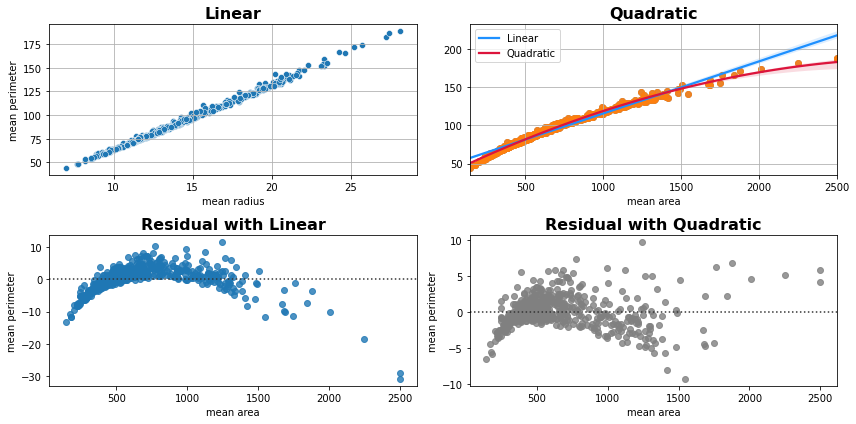

In [84]:
fig, axes = plt.subplots(nrows=2, ncols=2, 
                         figsize=(12, 6))
axs = axes.ravel()

sns.scatterplot(data=cancer_df, y="mean perimeter", x="mean radius", ax=axs[0])
axs[0].set_title("Linear", fontsize=16, fontweight='bold')
axs[0].grid()

sns.regplot(data=cancer_df, y="mean perimeter", x="mean area", ax=axs[1], 
            scatter=True, ci=95, order=1,
            scatter_kws ={'color': 'gray'}, 
            line_kws={"color": "dodgerblue", "label": "Linear"})


sns.regplot(data=cancer_df, y="mean perimeter", x="mean area", ax=axs[1], 
            scatter=True, ci=95, order=2,
            line_kws={"color": "crimson", "label": "Quadratic"}) 

# legend가 안 뜨다가 scatter=True로 설정하니까 둘다 뜸.

axs[1].set_title("Quadratic", fontsize=16, fontweight='bold')
axs[1].legend(loc='upper left')

axs[1].set_ylabel("")
axs[1].grid()

sns.residplot(data=cancer_df, y="mean perimeter", x="mean area", ax=axs[2], order=1)
axs[2].set_title("Residual with Linear", fontsize=16, fontweight='bold')


sns.residplot(data=cancer_df, y="mean perimeter", x="mean area", ax=axs[3], 
              order=2, color='gray')
axs[3].set_title("Residual with Quadratic", fontsize=16, fontweight='bold')

### TODO ###
# subplots 3칸 1칸으로 나눌 수 있나?


plt.tight_layout()

## Radius, Area 관련해서 생각해보자

왼쪽 그래프를 보면 굳이 회귀선을 그리지 않아도 선형관계가 있는 것이 보이고 오른쪽은 선형이라기에는 곡선의 모습을 보여 Qudratic 관계를 가정해봤습니다. 사실 Linear와 Quadratic 둘다 잔차를 보면 비슷한 모습을 보이지만 잔차의 크기(절댓값)을 보면 Quadratic이 근소하게 낫지 않을까합니다.

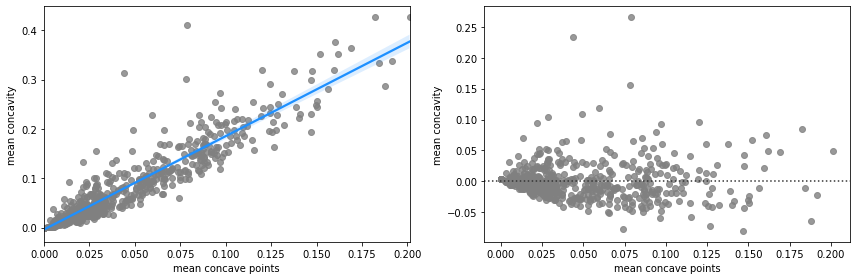

In [146]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axs = axes.ravel()

sns.regplot(data=cancer_df, y="mean concavity", x="mean concave points", ax=axs[0], 
            scatter=True, ci=95, order=1,
            scatter_kws ={'color': 'gray'}, 
            line_kws={"color": "dodgerblue", "label": "Linear"})

sns.residplot(data=cancer_df, y="mean concavity", x="mean concave points", ax=axs[1], 
              order=1, color='gray')

ax.grid()
plt.tight_layout()

`"mean concavity", "mean concave points"` 는 의미상 동일할 것 같아 확인해보니 선형성을 미약하게 띄는 것 같습니다. 변수들 사이의 관계를 알아보기 위해 이번에도 스피어먼 상관계수를 사용해서 상관관계를 알아보겠습니다.

In [141]:
ex_cancer_df = cancer_df.loc[:, columns]
ex_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


Text(0.5, 1.0, "Important variables correlation('spearman') map")

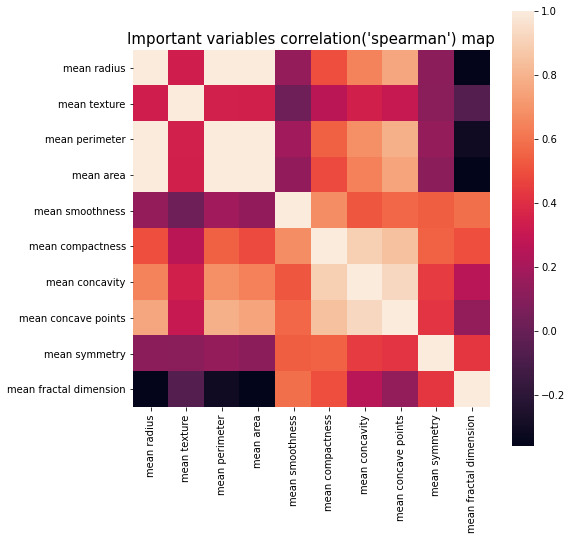

In [143]:
corrmat = ex_cancer_df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(corrmat, vmax=1., square=True, ax=ax)
ax.set_title("Important variables correlation('spearman') map", fontsize=15)

위에서 했던 대로 `'mean radius', 'mean perimeter', 'mean area'` 는 매우 큰 상관관계를 보입니다. `"mean concavity", "mean concave points"`도 큰 상관관계를 보이고 있네요. 추가적으로 `"mean concavity", "mean concave points"`는 `"mean compactness"`와도 큰 상관관계가 있습니다. 한번 확인해보겠습니다.

- [ ] `np.corrcoef`


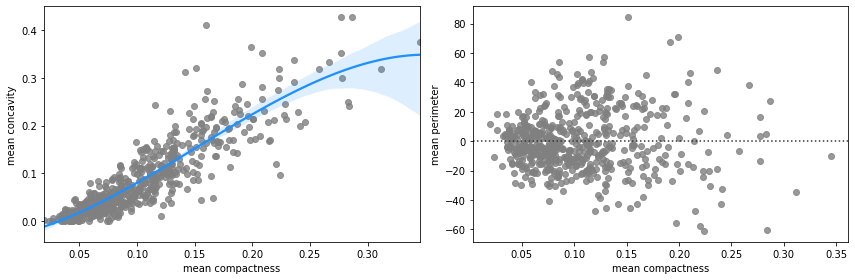

In [149]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axs = axes.ravel()

sns.regplot(data=cancer_df, y="mean concavity", x="mean compactness", ax=axs[0], 
            scatter=True, ci=95, order=3,
            scatter_kws ={'color': 'gray'}, 
            line_kws={"color": "dodgerblue", "label": "Linear"})

sns.residplot(data=cancer_df, y="mean perimeter", x="mean compactness", ax=axs[1], 
              order=1, color='gray')

ax.grid()
plt.tight_layout()

### (4) train, test 데이터 분리

In [149]:
X_train, X_test, y_train, y_test = train_test_split(cancer_data,
                                                    cancer_label,
                                                    test_size=0.2,
                                                    random_state=66)

In [150]:
print(f"X_train의 갯수: {len(X_train)}, y_train의 갯수: {len(y_train)}")
print(f"X_test의 갯수: {len(X_test)}, y_test의 갯수: {len(y_test)}")

X_train의 갯수: 455, y_train의 갯수: 455
X_test의 갯수: 114, y_test의 갯수: 114


### (5) 다양한 모델로 학습시켜보기

In [151]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=67)
print(f"decision_tree is a {decision_tree._estimator_type}")

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=67)
print(f"random_forest is a {random_forest._estimator_type}")

from sklearn import svm
svm_model = svm.SVC()
print(f"svm_model is a {svm_model._estimator_type}")

from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
print(f"sgd_model is a {sgd_model._estimator_type}")

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=100000)
print(f"logistic_model is a {logistic_model._estimator_type}")

decision_tree is a classifier
random_forest is a classifier
svm_model is a classifier
sgd_model is a classifier
logistic_model is a classifier


모델을 만들어 준 뒤 fit을 하고 정확도를 비교해야한다.

In [152]:
model_list = [decision_tree, random_forest, svm_model, sgd_model, logistic_model]
score_dict = {}

In [153]:
def fit_and_predict(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    score_dict[model] = round(acc, 3)

In [154]:
for model in model_list:
    fit_and_predict(model)

In [155]:
score_dict = dict(sorted(score_dict.items(), key=lambda x: x[1], reverse=True))

In [156]:
for k, v in score_dict.items():
    print(f"{k}: {v:.2%}")

RandomForestClassifier(random_state=67): 96.50%
LogisticRegression(max_iter=100000): 95.60%
DecisionTreeClassifier(random_state=67): 93.90%
SVC(): 89.50%
SGDClassifier(): 83.30%


이번에도 SVC, SGD가 비교적 낮은 정확도를 보이네요.


Scaling을 해주고 SVC에 대해서 먼저 확인해봅시다.

In [136]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

_주의: 이번에는 X_train이 pandas series기 때문에 `mean().mean()`으로 전체 평균을 계산했습니다. * np.nanmean(X_train)도 가능합니다._

In [164]:
X_train.mean().mean()

62.016962132417575

In [165]:
np.nanmean(X_train)

62.01696213241759

In [166]:
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_X_train = scaler.fit_transform(X_train)
print(">>> MinMax Scailing")
print(f"X_train's mean was {X_train.mean().mean():.3}, now {scaled_X_train.mean().mean():.3}")

>>> MinMax Scailing
X_train's mean was 62.0, now 0.247


In [167]:
svm_model.fit(scaled_X_train, y_train)
scaled_X_test = scaler.fit_transform(X_test)

pred = svm_model.predict(scaled_X_test)
acc = accuracy_score(y_test, pred)
print(f"After min max scaling, SVM has accuracy: {acc:.2%}")

After min max scaling, SVM has accuracy: 92.11%


In [169]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.fit_transform(X_train)
print(">>> Standard Scailing")
print(f"X_train's mean was {np.nanmean(X_train):.3}, now {np.nanmean(scaled_X_train):.3}")

>>> Standard Scailing
X_train's mean was 62.0, now 7.36e-17


In [170]:
svm_model.fit(scaled_X_train, y_train)
scaled_X_test = scaler.fit_transform(X_test)

pred = svm_model.predict(scaled_X_test)
acc = accuracy_score(y_test, pred)
print(f"After standard scaling, SVM has accuracy: {acc:.2%}")

After standard scaling, SVM has accuracy: 96.49%


In [171]:
scaler = RobustScaler()
scaler.fit(X_train)
scaled_X_train = scaler.fit_transform(X_train)
print(">>> Robust Scailing")
print(f"X_train's mean was {np.nanmean(X_train):.3}, now {np.nanmean(scaled_X_train):.3}")

>>> Robust Scailing
X_train's mean was 62.0, now 0.196


In [172]:
svm_model.fit(scaled_X_train, y_train)
scaled_X_test = scaler.fit_transform(X_test)

pred = svm_model.predict(scaled_X_test)
acc = accuracy_score(y_test, pred)
print(f"After robust scaling, SVM has accuracy: {acc:.2%}")

After robust scaling, SVM has accuracy: 94.74%


똑같은 과정을 그대로 SGD에 확인해보겠습니다.

In [173]:
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_X_train = scaler.fit_transform(X_train)
print(">>> MinMax Scailing")
print(f"X_train's mean was {np.nanmean(X_train):.3}, now {np.nanmean(scaled_X_train):.3}")

>>> MinMax Scailing
X_train's mean was 62.0, now 0.247


In [174]:
sgd_model.fit(scaled_X_train, y_train)
scaled_X_test = scaler.fit_transform(X_test)

pred = sgd_model.predict(scaled_X_test)
acc = accuracy_score(y_test, pred)
print(f"After min max scaling, SGD has accuracy: {acc:.2%}")

After min max scaling, SGD has accuracy: 92.11%


In [175]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.fit_transform(X_train)
print(">>> Standard Scailing")
print(f"X_train's mean was {np.nanmean(X_train):.3}, now {np.nanmean(scaled_X_train):.3}")

>>> Standard Scailing
X_train's mean was 62.0, now 7.36e-17


In [176]:
sgd_model.fit(scaled_X_train, y_train)
scaled_X_test = scaler.fit_transform(X_test)

pred = sgd_model.predict(scaled_X_test)
acc = accuracy_score(y_test, pred)
print(f"After standard scaling, SGD has accuracy: {acc:.2%}")

After standard scaling, SGD has accuracy: 97.37%


In [177]:
scaler = RobustScaler()
scaler.fit(X_train)
scaled_X_train = scaler.fit_transform(X_train)
print(">>> Robust Scailing")
print(f"X_train's mean was {np.nanmean(X_train):.3}, now {np.nanmean(scaled_X_train):.3}")

>>> Robust Scailing
X_train's mean was 62.0, now 0.196


In [178]:
sgd_model.fit(scaled_X_train, y_train)
scaled_X_test = scaler.fit_transform(X_test)

pred = sgd_model.predict(scaled_X_test)
acc = accuracy_score(y_test, pred)
print(f"After robust scaling, SGD has accuracy: {acc:.2%}")

After robust scaling, SGD has accuracy: 96.49%


이번에도 스케일링과 함께 훨씬 좋은 성능을 보여주는 SVM과 SGD입니다.

### 소감

가장 먼저 손글씨를 분류할 때와 모델을 학습시키고 예측하는 건 똑같은 방법이라 그리 어렵지 않았습니다. 다만 스케일링을 해줘야하고 왜 해줘야 하는지에 대해서 알 수 있었습니다. 시간이 부족해서, 게을러서 breast_cancer_dataset에 대해서는 많은 EDA와 Feature Engineering을 해보지는 못했습니다. 다음에는 조금 더 어떻게 Feature를 다뤄야하는지에 대해 추가해보도록 해야겠습니다.

#### More TODO
- [ ] Mutual Information 써먹어보기.